# Diabates Health Indicators BRFSS2015 Classification using ANN

### Features Summary

- Diabates : 0 = no diabetes 1 = prediabetes 2 = diabetes
- HighBP : 0 = no high BP 1 = high BP
- HighChol : 0 = no high cholesterol 1 = high cholesterol
- CholCheck : 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
- BMI : Body Mass Index
- Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
- Stroke : (Ever told) you had a stroke. 0 = no 1 = yes
- HeartDiseaseorAttack : coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity : physical activity in past 30 days - not including job 0 = no 1 = yes
- Fruits : Consume Fruit 1 or more times per day 0 = no 1 = yes
- Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
- AnyHealthcare : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
- NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
- GenHlth : Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
- MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
- PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
- DiffWalk : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
- Sex : 0 = female 1 = male
- Age : 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
- Education : Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
- Income : Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

## Load Libraries

In [704]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [705]:
pd.set_option('Display.max_columns', None)

## Load Dataset

In [706]:
df = pd.read_csv('../Diabetes-Health-Indicators-BRFSS2015-Classification-using-ANN/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [707]:
df['HealthyDiet'] = df['Fruits'] + df['Veggies']

df['HealthStatusScore'] = df['GenHlth'] + df['PhysHlth'] + df['MentHlth']

df['RiskScore'] = df['Smoker'] + df['HvyAlcoholConsump'] + df['HighChol'] + df['HighBP']


In [708]:
df.drop(columns=['Fruits', 'Veggies','GenHlth','PhysHlth','MentHlth','HvyAlcoholConsump'], inplace=True)

In [709]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,AnyHealthcare,NoDocbcCost,DiffWalk,Sex,Age,Education,Income,HealthyDiet,HealthStatusScore,RiskScore
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9.0,4.0,3.0,1.0,38.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,6.0,1.0,0.0,3.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,9.0,4.0,8.0,1.0,65.0,2.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,11.0,3.0,6.0,2.0,2.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,11.0,5.0,4.0,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,6.0,7.0,2.0,8.0,2.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.0,2.0,4.0,0.0,4.0,2.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,5.0,2.0,1.0,1.0,0.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7.0,5.0,1.0,2.0,3.0,1.0


In [710]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   AnyHealthcare         253680 non-null  float64
 10  NoDocbcCost           253680 non-null  float64
 11  DiffWalk              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
AnyHealthcare,253680.0,0.951053,0.215759,0.0,1.0,1.0,1.0,1.0


<Axes: >

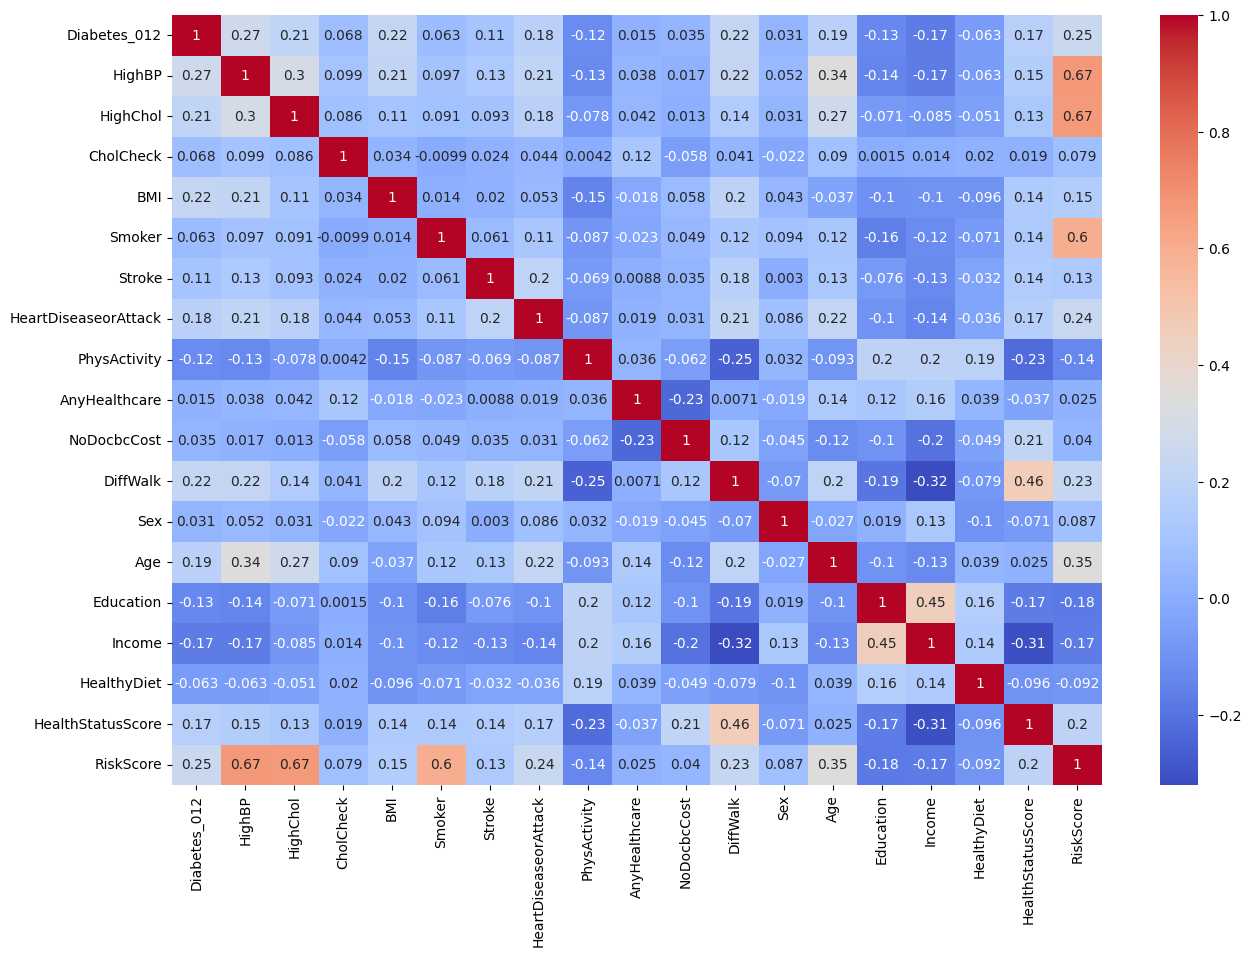

In [711]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [712]:
(df.isnull().sum() / len(df)) * 100

Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
HealthyDiet             0.0
HealthStatusScore       0.0
RiskScore               0.0
dtype: float64

In [713]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [714]:
df['Diabetes_012'] = df['Diabetes_012'].replace(2, 1)

In [715]:
from sklearn.model_selection import train_test_split

In [716]:
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

In [717]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [718]:
X_train.shape

(202944, 18)

In [719]:
y_train.value_counts()

Diabetes_012
0.0    170962
1.0     31982
Name: count, dtype: int64

In [720]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [721]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [722]:
y_resampled.value_counts()

Diabetes_012
1.0    170962
0.0    170962
Name: count, dtype: int64

In [723]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ELU
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [724]:
model = Sequential()
model.add(Dense(64, input_dim=18, kernel_regularizer=l2(0.0001),kernel_initializer='glorot_normal'))
model.add(BatchNormalization())

model.add(Dense(64))
model.add(ELU(alpha=1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(ELU(alpha=1))
model.add(Dropout(0.1))

model.add(Dense(32))
model.add(ELU(alpha=1))

model.add(Dense(1, activation='sigmoid'))

c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [725]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_153 (Dense)               │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_64 (ELU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_65 (ELU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_66 (ELU)                    │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 256 (1.00 KB)

In [726]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [727]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_resampled, y_resampled,
                    validation_split=0.3,
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stop])

Epoch 1/100
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.7562 - loss: 0.4870 - val_accuracy: 0.5736 - val_loss: 0.8085
Epoch 2/100
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - accuracy: 0.7673 - loss: 0.4706 - val_accuracy: 0.4512 - val_loss: 0.9267
Epoch 3/100
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7701 - loss: 0.4679 - val_accuracy: 0.4390 - val_loss: 0.9371
Epoch 4/100
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.7715 - loss: 0.4653 - val_accuracy: 0.4071 - val_loss: 0.9444
Epoch 5/100
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.7704 - loss: 0.4648 - val_accuracy: 0.4876 - val_loss: 0.8406
Epoch 6/100
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.7723 - loss: 0.4622 - val_accuracy: 0.5306 - val_loss: 0.8438
Epoch 7/100
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.7717 - loss: 0.4631 - val_accuracy: 0.4581 - val_loss: 0.8655
Epoch 8/100
3740/3740 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.774

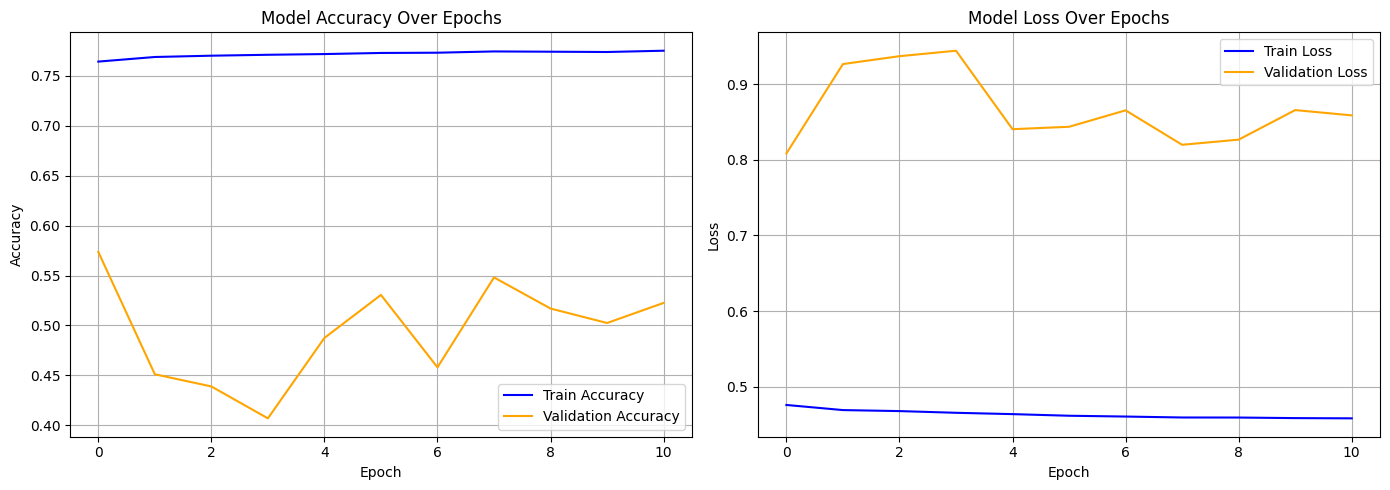

In [728]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Accuracy:  0.8068432671081678
              precision    recall  f1-score   support

         0.0     0.9116    0.8535    0.8816     42741
         1.0     0.4158    0.5573    0.4763      7995

    accuracy                         0.8068     50736
   macro avg     0.6637    0.7054    0.6789     50736
weighted avg     0.8334    0.8068    0.8177     50736



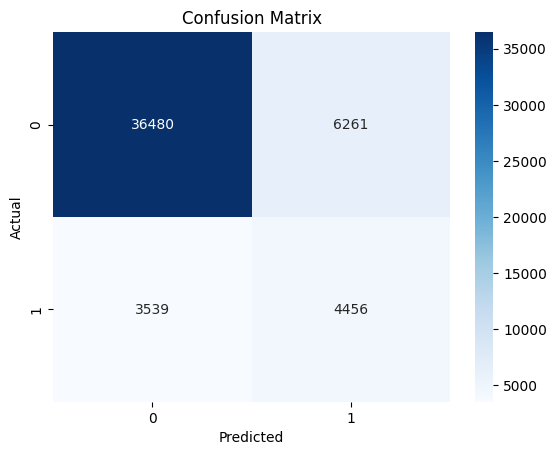

In [729]:
# Predict
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()



# Classification Report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


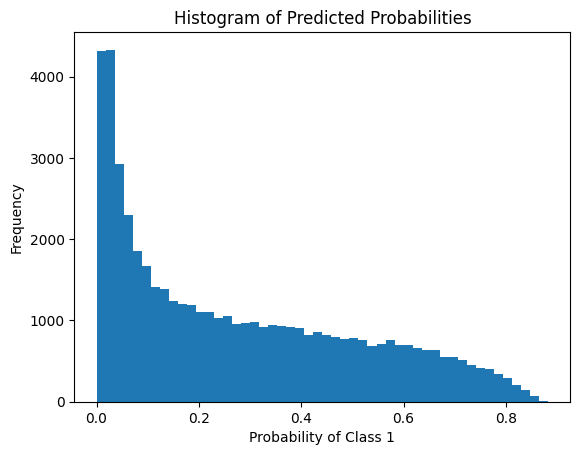

In [730]:
import matplotlib.pyplot as plt

plt.hist(y_pred_probs, bins=50)
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Probability of Class 1")
plt.ylabel("Frequency")
plt.show()


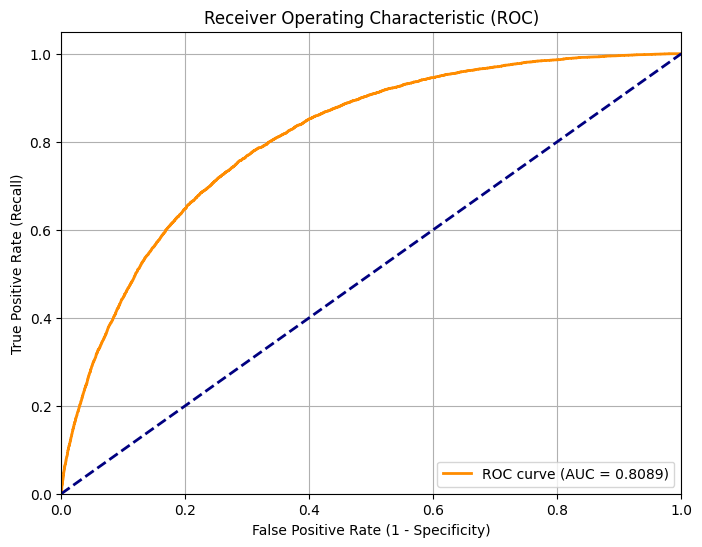

In [731]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
